# Life Expectancy - GDP
This project will investigate if there is a relation between the economic output of a country and the life expectancy of its citizens.

The goal is to prepare data, analyse the data with plots, and find conclusions.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Import Python Modules

First import thefrom matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline modules that will be used in this project:

In [14]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Loading Data
To look for connections between GDP and life expectancy load the datasets into DataFrames so that they can be visualized.

Here `all_data.csv` will be read in into a DataFrame called `countries_info`, followed by using `.head()` to check its contents.

In [15]:
countries_info = pd.read_csv('all_data.csv')
countries_info.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Another to check the shape of the data. It seems that there are 96 observations or rows and 4 columns.

In [16]:
countries_info.shape

(96, 4)

## Explore the Data
First, lets explore the countries of the dataset. There seems to be six countries, Chile, China, Germany, Mexico, the US, and Zimbabwe represented in the data.

In [17]:
print(f'Countries: {countries_info.Country.unique()}')

Countries: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Now, lets explore some `info` to get a review of the data.

In [18]:
print(countries_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


There doesn't seem to be any non-null value. Now, lets just change the name of the column of Life expectancy so it can be accesses in an easier way.

In [19]:
countries_info.rename(columns={'Life expectancy at birth (years)':'Life_expectancy'}, inplace=True) # change name of columns
print(countries_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


Now, lets use the `describe` method to see any interesting summary data.

In [20]:
print(countries_info.describe(include='all'))

       Country         Year  Life_expectancy           GDP
count       96    96.000000        96.000000  9.600000e+01
unique       6          NaN              NaN           NaN
top      Chile          NaN              NaN           NaN
freq        16          NaN              NaN           NaN
mean       NaN  2007.500000        72.789583  3.880499e+12
std        NaN     4.633971        10.672882  5.197561e+12
min        NaN  2000.000000        44.300000  4.415703e+09
25%        NaN  2003.750000        74.475000  1.733018e+11
50%        NaN  2007.500000        76.750000  1.280220e+12
75%        NaN  2011.250000        78.900000  4.067510e+12
max        NaN  2015.000000        81.000000  1.810000e+13


## Exploratory Plots
As seen in the previous steps, the data contains six different countries: Chile, China, Germany, Mexico, United States of America, and Zimbabwe. In step below, we can see the mean and distribution of life expectancy of each country.

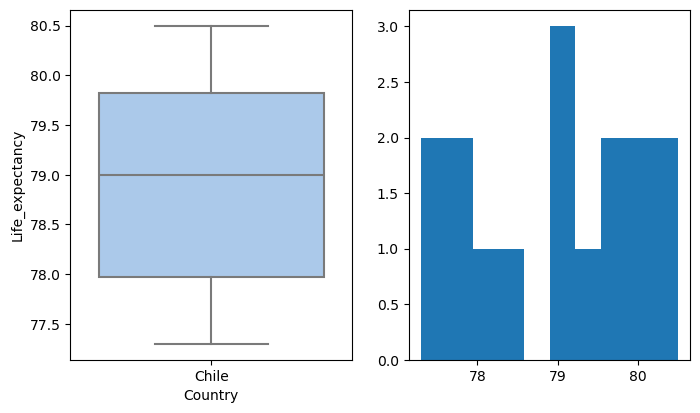

<Figure size 640x480 with 0 Axes>

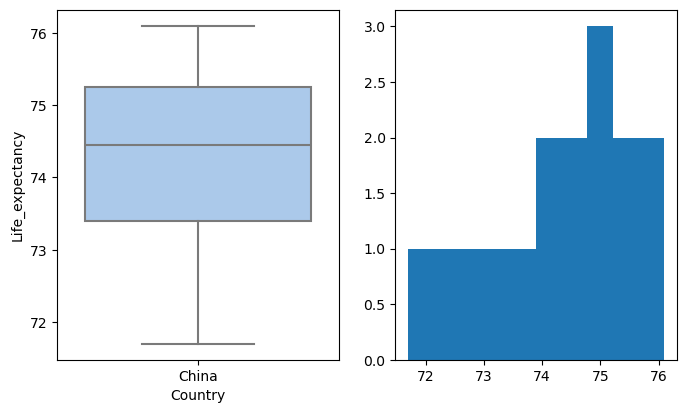

<Figure size 640x480 with 0 Axes>

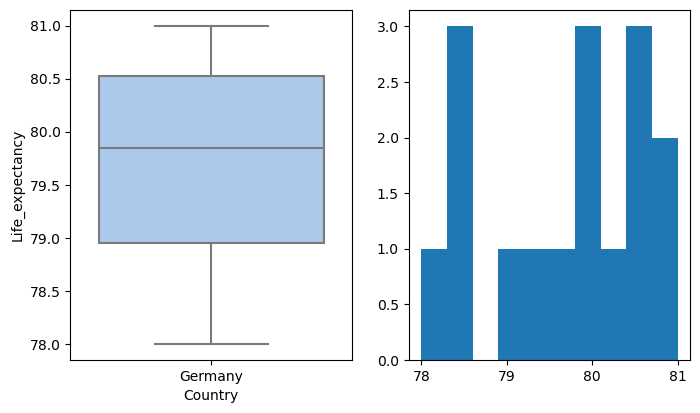

<Figure size 640x480 with 0 Axes>

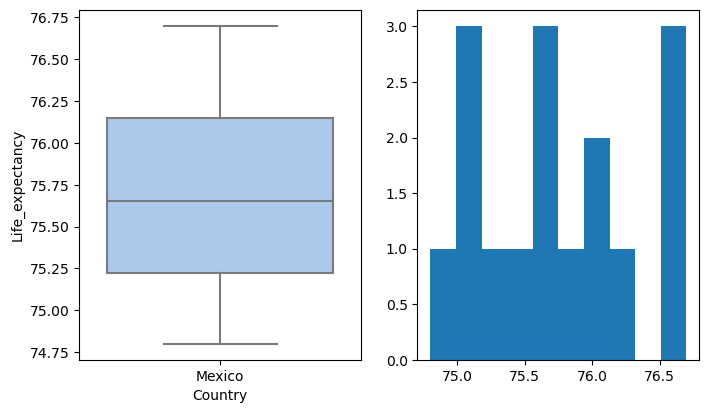

<Figure size 640x480 with 0 Axes>

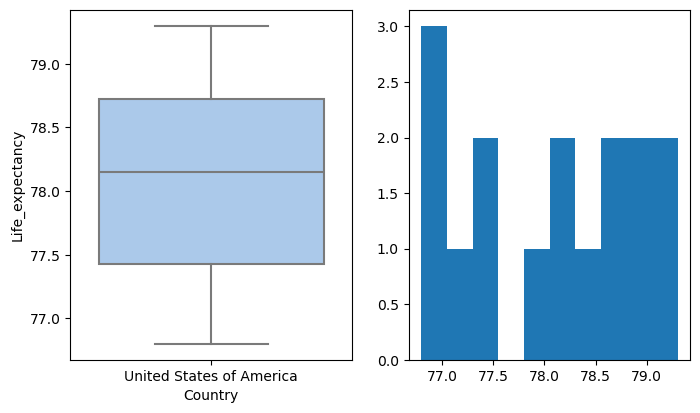

<Figure size 640x480 with 0 Axes>

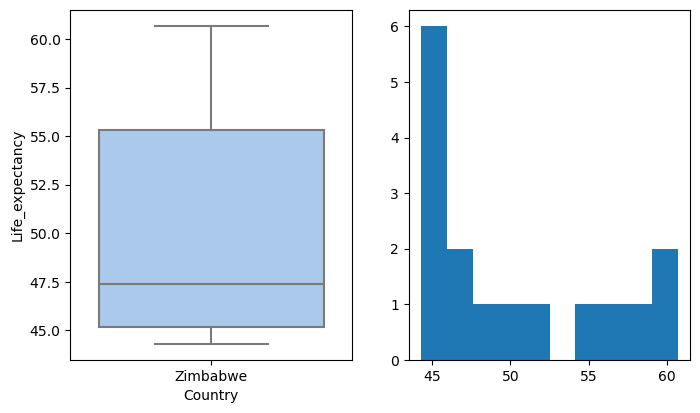

<Figure size 640x480 with 0 Axes>

In [21]:
countries = countries_info.Country.unique()

# Iterate each country and plot the mean and the distribution of the life expectancy.
for country in countries:
    country_info = countries_info[countries_info.Country == country]
    
    plt.figure(figsize=(8,10))
    
    plt.subplot(2, 2, 1)
    sns.boxplot(x = "Country", y = "Life_expectancy", palette = "pastel", data = country_info)
    
    plt.subplot(2, 2, 2)
    plt.hist(country_info.Life_expectancy)
    
    plt.show()
    plt.clf()

## Scatter plots

The next step is to plot the life expectancies and GDP of each country over the years to see how they been changing over time

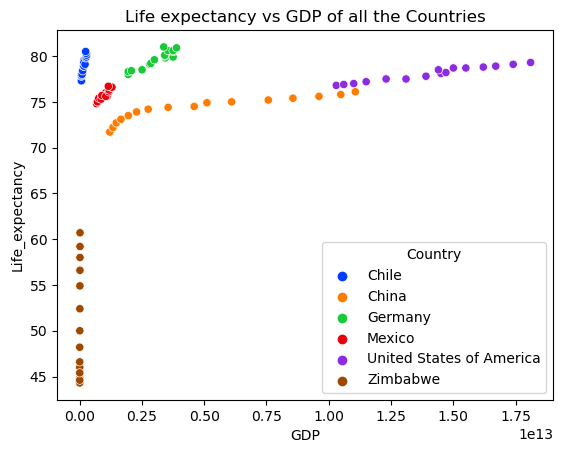

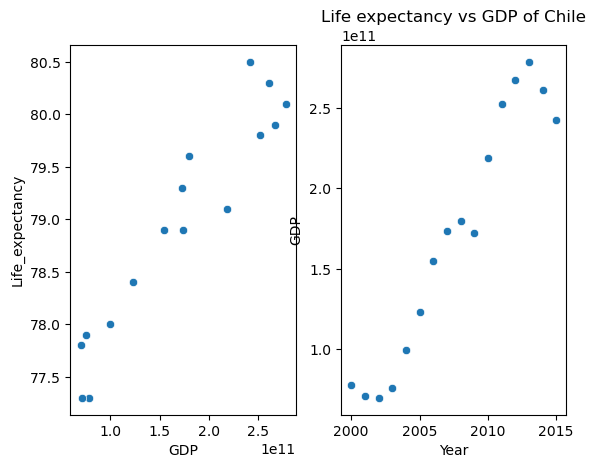

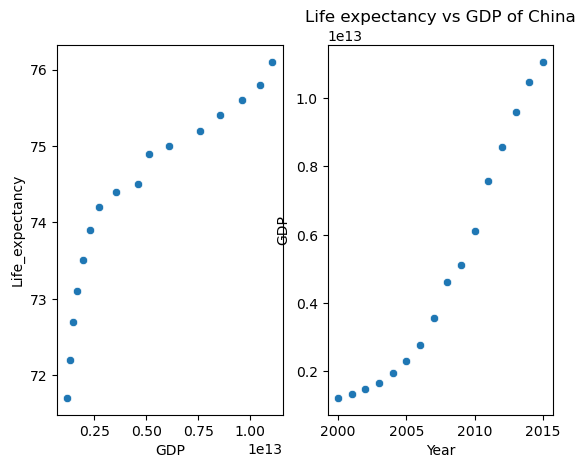

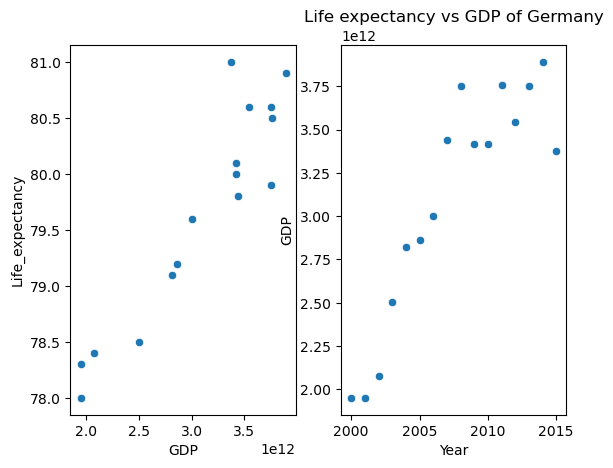

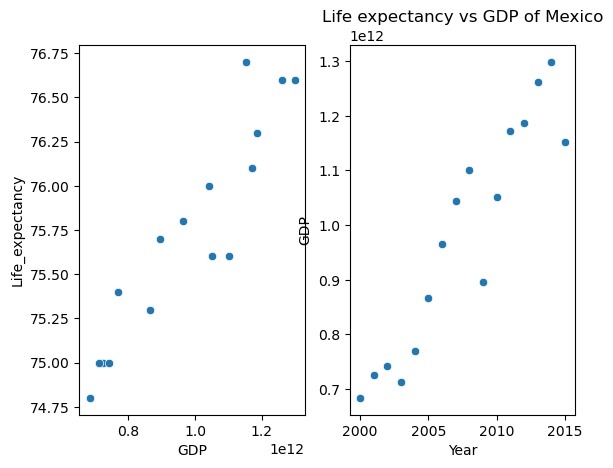

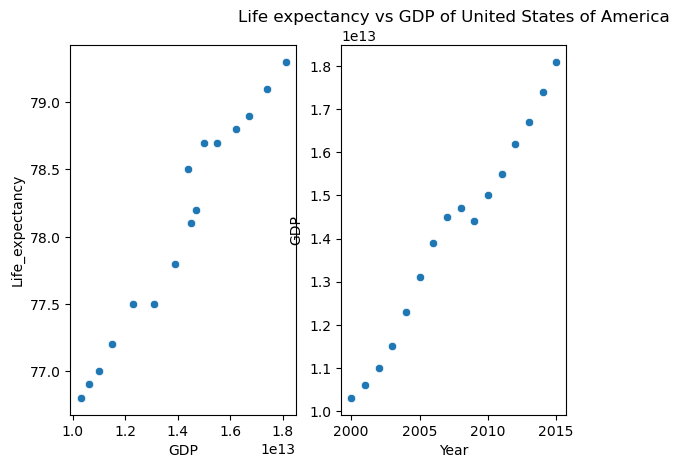

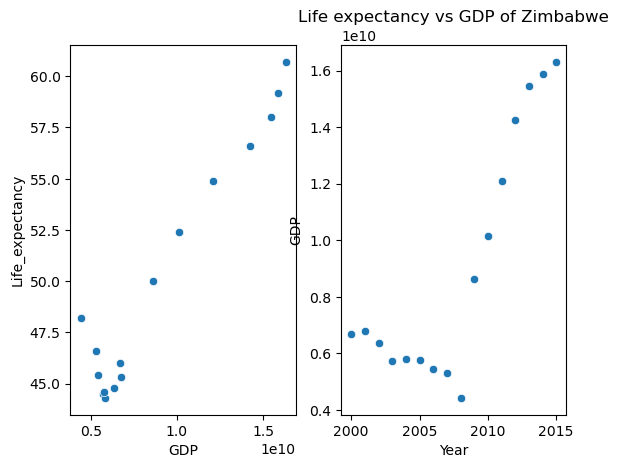

<Figure size 640x480 with 0 Axes>

In [22]:
# Main scatter plot that shows all the countries together
sns.scatterplot(x = 'GDP', y = 'Life_expectancy', hue = 'Country', palette = 'bright', data = countries_info)
plt.title(f'Life expectancy vs GDP of all the Countries')
plt.show()
plt.clf()

# Show how the life expectancy and GDP has been chaning for each country
for country in countries:
    country_info = countries_info[countries_info.Country == country]

    # scatter plot of all the countries
    plt.subplot(1, 2, 1)
    sns.scatterplot(x = 'GDP', y = 'Life_expectancy', data = country_info)
    
    plt.subplot(1, 2, 2)
    sns.scatterplot(x = 'Year', y = 'GDP', data = country_info)

    plt.title(f'Life expectancy vs GDP of {country}')
    plt.show()
    plt.clf()

## Pearson Correlation

From the graphs it can be shown that there seems a linear correlation between the variables. To validate the asumption, the pearson correlation will be used to asses the relationship.

In [24]:
from scipy.stats import pearsonr
# calculate the pearson correlation coefficient and the pvalue to see if there is any relation for each country
for country in countries:
    country_info = countries_info[countries_info.Country == country]
    
    corr_coefficient, pvalue = pearsonr(country_info.GDP, country_info.Life_expectancy)
    print(f'The correlation coefficient of {country} is: {corr_coefficient} with a pvalue of {pvalue}')
    

The correlation coefficient of Chile is: 0.9498766659254413 with a pvalue of 1.8659139746586447e-08
The correlation coefficient of China is: 0.9085255408648356 with a pvalue of 1.1250985720700828e-06
The correlation coefficient of Germany is: 0.932698898256127 with a pvalue of 1.4018815534045607e-07
The correlation coefficient of Mexico is: 0.9322377167847085 with a pvalue of 1.4686960248304653e-07
The correlation coefficient of United States of America is: 0.9817092382430257 with a pvalue of 1.749970926909946e-11
The correlation coefficient of Zimbabwe is: 0.9661998955858779 with a pvalue of 1.2358516366845632e-09


## Analysis
The correlation coefficient shows that there is a linear correlation between the life expectancy and GDP of a country. All the correlation coefficients are between 0.90 and 0.98, showing a strong correlation. This means that we could use a simple linear regression model of the statsmodel library to predict the life expectancy based on GDP.
Furthermore, the probability value (pvalue) is less than 5%. This means that we can be sure 95% sure that there is a relation between life expectancy and GDP. 

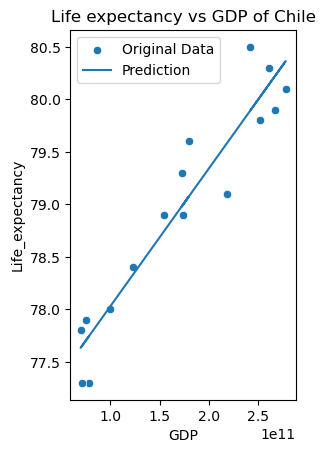

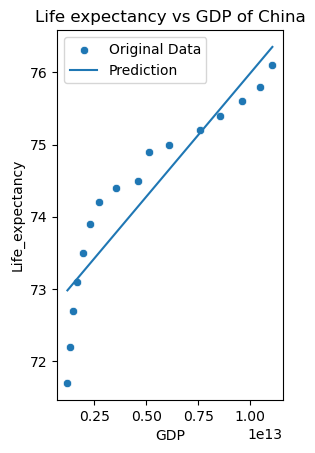

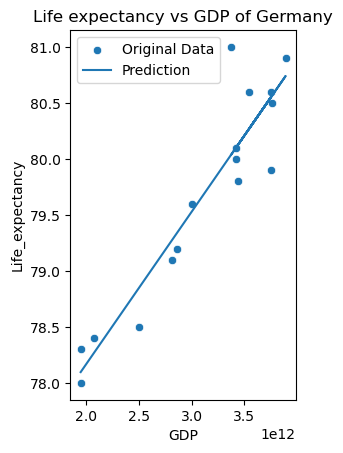

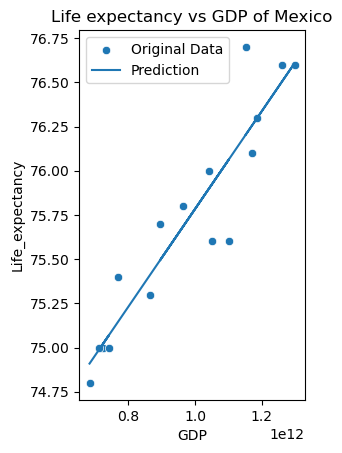

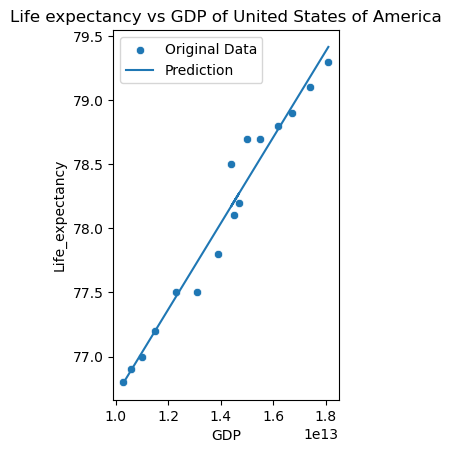

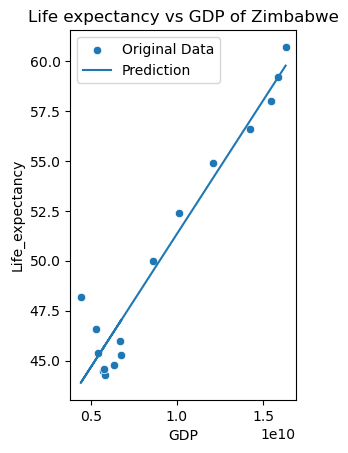

<Figure size 640x480 with 0 Axes>

In [25]:
import statsmodels.api as sm

# showing the scatter plot and the prediction using the model
for country in countries:
    country_info = countries_info[countries_info.Country == country]
    model = sm.OLS.from_formula('Life_expectancy ~ GDP', country_info).fit()

    # scatter plot of all the countries
    plt.subplot(1, 2, 1)
    sns.scatterplot(x = 'GDP', y = 'Life_expectancy', label='Original Data', data = country_info)
    plt.plot(country_info.GDP, model.predict(country_info.GDP), label='Prediction')
    plt.title(f'Life expectancy vs GDP of {country}')
    plt.legend()
    plt.show()
    plt.clf()

# Conclusion
This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns.

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns. 

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.